In [1]:
from torchvision import datasets
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val = datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# 이미지 데이터를 변경하는 라이브러리
from torchvision import transforms
dir(transforms) # 해당 명령어가 가지고 있는 함수리스트를 보여줌

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [3]:
img, label =  cifar10[0] # 0번째 데이터를 가져온다

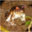

In [4]:
img

In [5]:
# 토치에서 제공하는 데이터를 변환작업을 하지 않으면 이미지 데이터를 가져오고
# 수치데이터로 변경하려면
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [6]:
# 셈플데이터은 CIFAR-10의 채널은 3
import torch.nn as nn
conv = nn.Conv2d(3,16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [7]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [8]:
# nn.Conv2d는 입력으로 B C H W 받으므로 이미지 한개를 적용해 보려면 0번째 차원을 unsqueeze를 통해서 느린다.(배치사이즈로사용)

In [9]:
img,label = cifar10[0]
img_t = to_tensor(img)
print(img_t.shape)
img_t = img_t.unsqueeze(0)
img_t.shape

torch.Size([3, 32, 32])


torch.Size([1, 3, 32, 32])

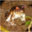

In [10]:
img

In [11]:
output =  conv(img_t)
output.shape

torch.Size([1, 16, 30, 30])

In [12]:
import matplotlib.pylab as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [16]:
output[0,0].detach().shape

torch.Size([30, 30])

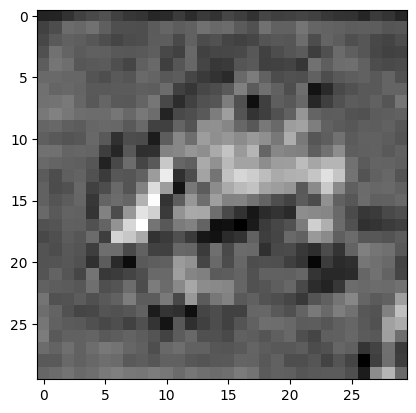

In [18]:
plt.imshow(output[0,0].detach(),cmap='gray')

In [24]:
import torch
tensor_cifar10 = datasets.CIFAR10(data_path,train=True,download=False, transform=transforms.ToTensor())
for image, label in tensor_cifar10:
    print(image.shape, label)
    break

torch.Size([3, 32, 32]) 6


In [25]:
imgs = torch.stack( [img_t for img_t, label in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
imgs.view(3,-1)

tensor([[0.2314, 0.6039, 1.0000,  ..., 0.0471, 0.7647, 0.6392],
        [0.2431, 0.6941, 1.0000,  ..., 0.1216, 0.7451, 0.6392],
        [0.2471, 0.7333, 1.0000,  ..., 0.1961, 0.6706, 0.6314]])

In [26]:
# 채널별로 평균
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [27]:
# 채널별로 표준편차
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [28]:
torch_normalize = transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

In [29]:
# 데이터를 가져올때는 데이터를 정규화하면서 가져온다.
from torchvision import datasets
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True
                           ,transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           torch_normalize
                                       ])    
                          )

cifar10_val = datasets.CIFAR10(data_path,train=False,download=True
                           ,transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           torch_normalize
                                       ])    
                          )

Files already downloaded and verified
Files already downloaded and verified


In [30]:
img,label = cifar10[0]

In [31]:
img.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


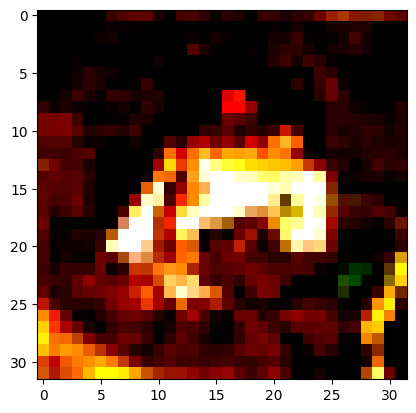

In [55]:
# plt 로 이미지를 그릴대는 마지막이 차수
plt.imshow(img.permute(1,2,0) )

In [48]:
conv(img).shape

torch.Size([16, 30, 30])

torch.Size([30, 30])


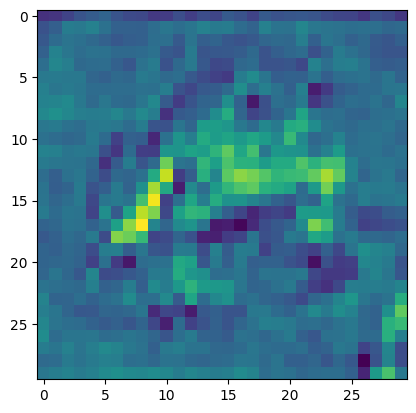

In [45]:
print(conv(img)[0].detach().shape)
plt.imshow(conv(img)[0].detach())